# TP 2 - Redes en el cerebro


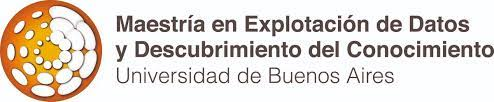

**_Data mining en Ciencia y Tecnología_**  
2do cuatrimestre 2023

[Víctor A. Bettachini](mailto:bettachini@gmail.com)  
2023-11-14

In [1]:
# Conectar a drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir = '/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/TP2'

## 4. Preprocesamiento de datos

### Carga datos
Cargar el dataset con los datos para cada sujeto y los nombres y coordenadas de las
regiones cerebrales a las que se les registró la actividad.

In [3]:
from pathlib import Path
if not Path("./DataSujetos").is_dir():
  ! wget -q https://www.dropbox.com/s/eei6gnw10o20mcn/DataSujetos.zip?dl=1 -O DataSujetos.zip
  ! unzip -q DataSujetos
  ! rm DataSujetos.zip

In [4]:
if not Path("./aal_extended_withCoords.csv").exists():
  ! wget -q "https://www.dropbox.com/scl/fi/pu1qdch4c3khk0uol9l0w/aal_extended_withCoords.csv?rlkey=bsnfot3b9ycp7slble59e1cws&dl=1n" -O aal_extended_withCoords.csv

### Descripción de los datos

Sujetos = 18  
Estados de sueño 4 condiciones, una correspondiente a vigilia y 3 a diferentes estadios del sueño no REM (*rapid eye movement*):  
- "W": despierto ("Wake")  
- "N1": sueño "leve"  
- "N2": sueño "intermedio"  
- "N3": sueño "profundo"  

## Manipulación de datos

### Cargar todas las matrices de conectividad

In [5]:
import numpy as np

In [6]:
# diccionario con arrays de los datos de cada sujeto para archivos W_
W = {}
# read all W_*.csv in DataSujetos
for f in Path("./DataSujetos").glob("W_*.csv"):
  W[f.stem] = np.loadtxt(f, delimiter=",")
  n = W[f.stem].shape[0]
  W[f.stem] -= np.diag(np.ones(n))
# quitar el prefijo W_suj
# cambiar key a int
W = {int(k.replace('W_suj','')):v for k,v in W.items()}

In [7]:
# diccionario con arrays de los datos de cada sujeto para archivos N1_
N1 = {}
# read all N1_*.csv in DataSujetos
for f in Path("./DataSujetos").glob("N1_*.csv"):
  N1[f.stem] = np.loadtxt(f, delimiter=",")
  n = N1[f.stem].shape[0]
  N1[f.stem] -= np.diag(np.ones(n))
# quitar el prefijo N1_suj
# cambiar key a int
N1 = {int(k.replace('N1_suj','')):v for k,v in N1.items()}

In [8]:
# diccionario con arrays de los datos de cada sujeto para archivos N2_
N2 = {}
# read all N2_*.csv in DataSujetos
for f in Path("./DataSujetos").glob("N2_*.csv"):
  N2[f.stem] = np.loadtxt(f, delimiter=",")
  n = N2[f.stem].shape[0]
  N2[f.stem] -= np.diag(np.ones(n))
# quitar el prefijo N2_suj
# cambiar key a int
N2 = {int(k.replace('N2_suj','')):v for k,v in N2.items()}

In [9]:
# diccionario con arrays de los datos de cada sujeto para archivos N3_
N3 = {}
# read all N3_*.csv in DataSujetos
for f in Path("./DataSujetos").glob("N3_*.csv"):
  N3[f.stem] = np.loadtxt(f, delimiter=",")
  n = N3[f.stem].shape[0]
  N3[f.stem] -= np.diag(np.ones(n))
# quitar el prefijo N3_suj
# cambiar key a int
N3 = {int(k.replace('N3_suj','')):v for k,v in N3.items()}

## 3. Tarea 1: Visualización

### Promedio de matrices de conectividad para cada estado de sueño

In [10]:
W_mean = np.mean(np.stack(list(W.values())), axis=0)
N1_mean = np.mean(np.stack(list(N1.values())), axis=0)
N2_mean = np.mean(np.stack(list(N2.values())), axis=0)
N3_mean = np.mean(np.stack(list(N3.values())), axis=0)

In [11]:
W_mean.shape

(116, 116)

In [12]:
try:
  import seaborn as sns
  import matplotlib.pyplot as plt
except:
  ! pip install -q seaborn
  import seaborn as sns
  import matplotlib.pyplot as plt

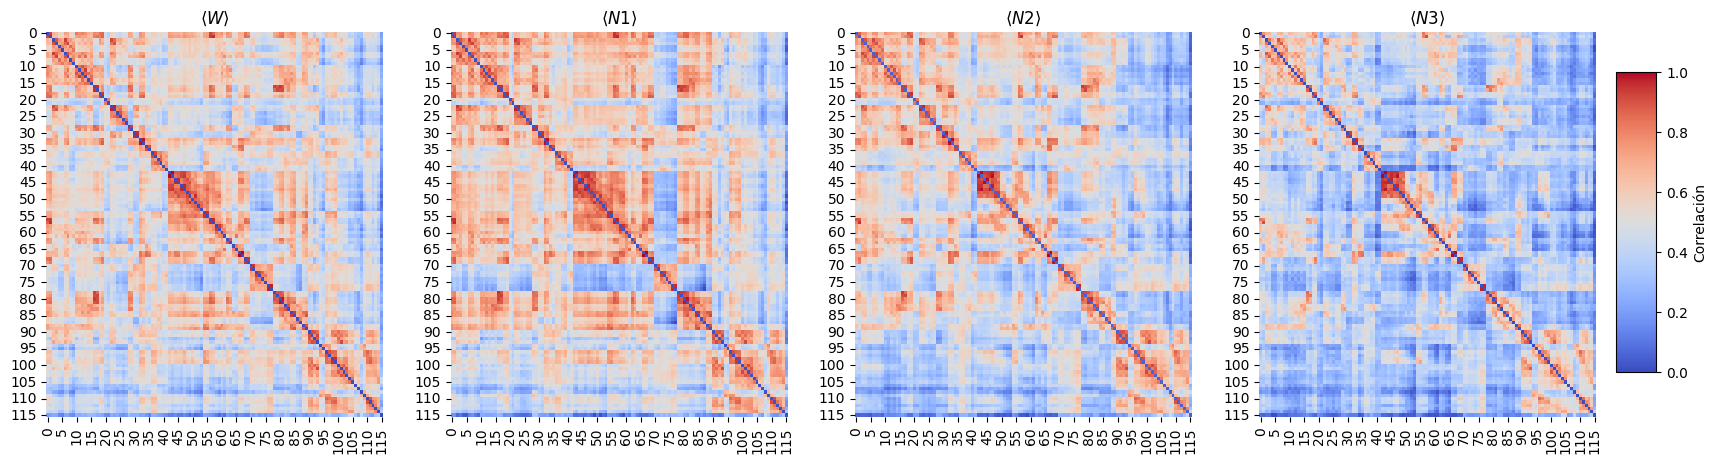

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
sns.heatmap(W_mean, ax=ax[0], cmap="coolwarm", cbar= False)
ax[0].set_title(r"$\langle W \rangle$")
sns.heatmap(N1_mean, ax=ax[1], cmap="coolwarm", cbar= False)
ax[1].set_title(r"$\langle N1 \rangle$")
sns.heatmap(N2_mean, ax=ax[2], cmap="coolwarm", cbar= False)
ax[2].set_title(r"$\langle N2 \rangle$")
sns.heatmap(N3_mean, ax=ax[3], cmap="coolwarm", cbar= False)
ax[3].set_title(r"$\langle N3 \rangle$")

right_edge = ax[3].get_position().xmax  # Right edge of the last subplot
cax = fig.add_axes([right_edge + 0.01, 0.2, 0.02, 0.6])  # Position colorbar slightly to the right
sm = plt.cm.ScalarMappable(cmap="coolwarm")
sm.set_array([])
fig.colorbar(sm, label="Correlación", cax=cax)

plt.show()

### Tamaño de componente gigante en función de umbral de densidad $\delta$

#### Matriz de adyacencia binaria
Transformar dicha matriz de adyacencia pesada a una matriz de adyacencia binaria $A_{i,j}$ que represente una una densidad de enlaces $\delta = 0.08$.
¿Cuál es el valor de umbral de correlación entre pares de regiones que tuvo que utilizar?

Repaso de definiciones
- grado, es el número de enlaces del nodo i, $k_i = \sum_{j=1}^n A_{i,j}$ siendo $n$ el número de nodos
- el número total de enlaces $m = \frac{1}{2} \sum_{i=1}^n k_i = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n A_{i,j}$, para grafos no dirigidos (el medio es porque se cuenta doble)
- densidad $\rho = \frac{2 m}{n (n-1)}$

In [13]:
def density_to_th(matAdyPesada, densidad):
    # calcula el umbral para producir una densidad determinada
    n = matAdyPesada.shape[0]
    max_links = (n*(n-1))//2
    tril_idx = np.tril_indices(n,-1)
    c = sorted(np.array(list(matAdyPesada[tril_idx].reshape(-1))), reverse=True)
    return c[int((len(c)-1)* densidad)]

In [14]:
try:
  import networkx as nx
except:
  ! pip install networkx
  import networkx as nx

In [15]:
def matrizAdyacenciaBinaria(matAdyacPesada, densidad):
    # genera la matriza de adyacencia binaria para una densidad dada
    umbral = density_to_th(matAdyacPesada, densidad)
    matAdyacBinaria = matAdyacPesada >= umbral
    return nx.from_numpy_array(matAdyacBinaria)

In [16]:
def get_tamaño_max(matAdyacPesada, densidad):
    # función que obtiene tamaño de componente gigante a partir de matriz de adyacencia pesada y una densidad objetivo
    G = matrizAdyacenciaBinaria(matAdyacPesada, densidad)
    componentes = list(nx.connected_components(G))
    componente_tamaños = [len(componente) for componente in componentes]
    return np.max(componente_tamaños)

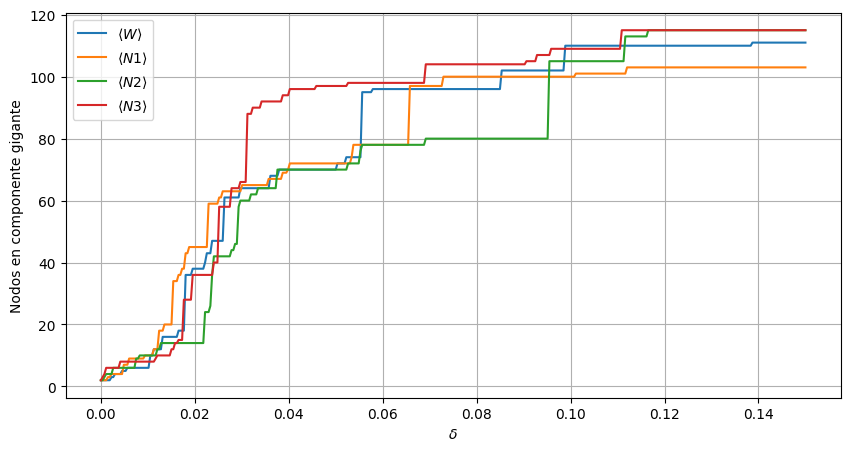

In [17]:
# plot de tamaño de componente gigante en función de densidad para cada matriz de adyacencia pesada promedio
densidades = np.linspace(0.0,0.15,400)
tamaños_max = np.zeros((4, len(densidades)))
for i, densidad in enumerate(densidades):
    tamaños_max[0,i] = get_tamaño_max(W_mean, densidad)
    tamaños_max[1,i] = get_tamaño_max(N1_mean, densidad)
    tamaños_max[2,i] = get_tamaño_max(N2_mean, densidad)
    tamaños_max[3,i] = get_tamaño_max(N3_mean, densidad)

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(densidades, tamaños_max[0,:], label=r"$\langle W \rangle$")
ax.plot(densidades, tamaños_max[1,:], label=r"$\langle N1 \rangle$")
ax.plot(densidades, tamaños_max[2,:], label=r"$\langle N2 \rangle$")
ax.plot(densidades, tamaños_max[3,:], label=r"$\langle N3 \rangle$")
ax.set_xlabel("$\delta$")
ax.set_ylabel("Nodos en componente gigante")
ax.legend()
ax.grid()
plt.show()


Una inspección visual revela los siguientes saltos
| Estado sueño | Densidad | Salto de nodos en componente gigante |
|--------------|----------|--------------------------------------|
| W            | $\approx 0.055$    | $\approx 75 \rightarrow \approx 95$                                    |
| N1           | $\approx 0.065$    | $\approx 75 \rightarrow \approx 95$                                    |
| N2           | $\approx 0.095$    | $\approx 80 \rightarrow \approx 105$                                    |
| N3           | $\approx 0.03$    | $\approx 65 \rightarrow \approx 90$                                    |

- Interpretar las curvas
- ¿Qué indican los saltos?

### Analizar uno de los saltos

Detalle del salto para $\langle N2 \rangle$.

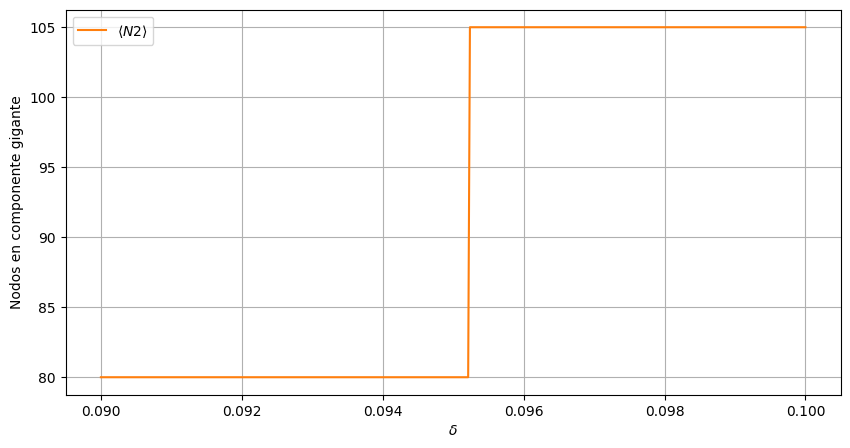

In [18]:
densidades_salto_N2 = np.linspace(0.09,0.1,400)
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(
  densidades_salto_N2, [(get_tamaño_max(N2_mean, densidad)) for densidad in densidades_salto_N2]
  , label=r"$\langle N2 \rangle$", color="C1"
)
ax.set_xlabel("$\delta$")
ax.set_ylabel("Nodos en componente gigante")
ax.legend()
ax.grid()
plt.show()


In [19]:
import pandas as pd
# Carga de coordenadas de regiones
RegionsNames = pd.read_csv("aal_extended_withCoords.csv", header=None).iloc[:,1:]

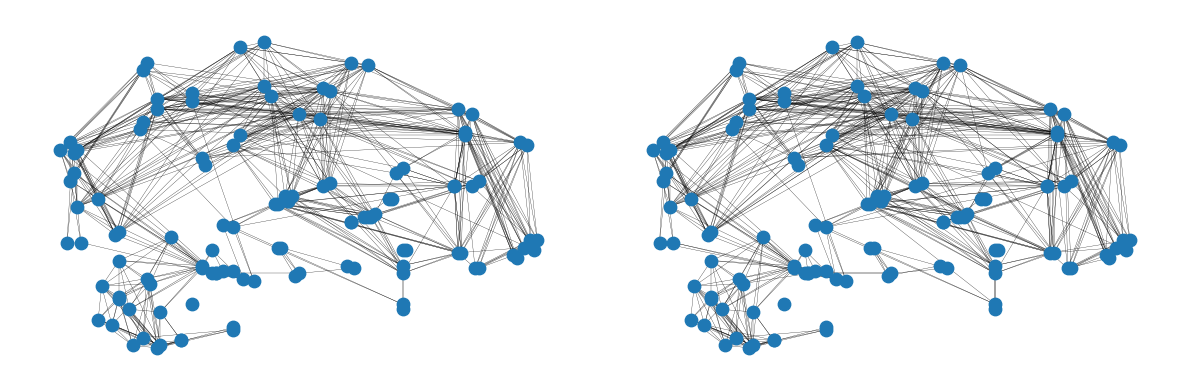

In [ ]:
# Visualizar el grafo, ubicando los nodos en sus coordenadas cerebrales y coloreando cada nodo de acuerdo a su coeficiente de clustering Ci
fig, ax = plt.subplots(1,2, figsize=(12,4))
fig.tight_layout()
layout = dict(zip(range(n),np.array([RegionsNames[6].values, RegionsNames[7].values]).T))

densidad_objetivo = 0.09
G = matrizAdyacenciaBinaria(N2_mean, densidad_objetivo)
#plt.box(False)
ax[0].set_frame_on(False)
ax[0] = nx.draw_networkx(G, layout,
  with_labels = False, node_size = 80, width = 0.2, ax=ax[0]
)

densidad_objetivo = 0.1
G = matrizAdyacenciaBinaria(N2_mean, densidad_objetivo)
ax[1].set_frame_on(False)
ax[1] = nx.draw_networkx(G, layout,
  with_labels = False, node_size = 80, width = 0.2, ax=ax[0]
)

fig.tight_layout()

Es muy sutil, pero se ven más conexiones a la derecha en particular en la zona donde hay ya bastante densidad en el de la izquierda.
Si interpreto bien las coordenadas son notarios los nuevos enlaces que van a la corteza frontal.

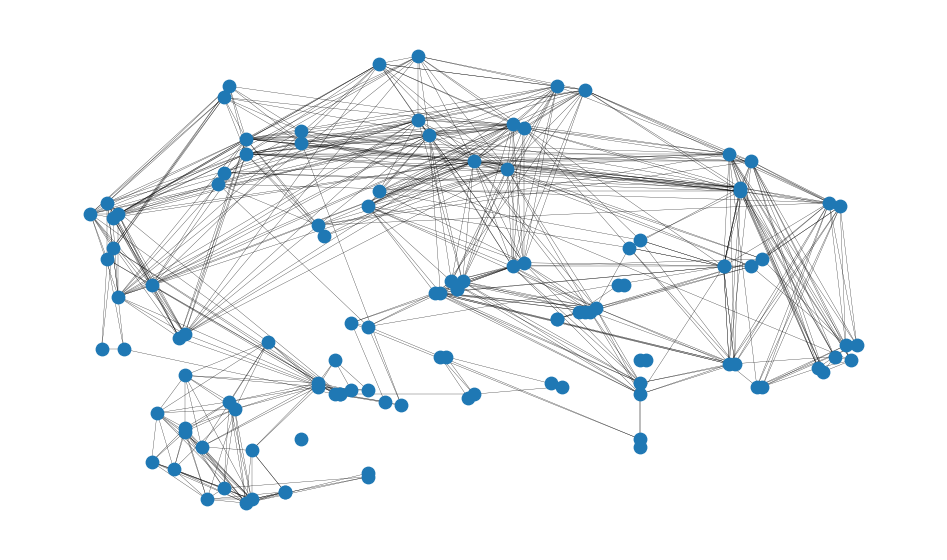

In [ ]:
densidad_objetivo = 0.09
G = matrizAdyacenciaBinaria(N2_mean, densidad_objetivo)

# Visualizar el grafo, ubicando los nodos en sus coordenadas cerebrales y coloreando cada nodo de acuerdo a su coeficiente de clustering Ci
fig, ax = plt.subplots(figsize=(10,6))
fig.tight_layout()
layout = dict(zip(range(n),np.array([RegionsNames[6].values, RegionsNames[7].values]).T))
ax = nx.draw_networkx(G, layout,
  with_labels = False, node_size = 80, width = 0.2
)
# ax.title.set_fontsize(20)
# ax.set_title(r"$\delta = $"+str(densidad_objetivo))
plt.box(False)

# Punto 2. Comunidades

## Variación de coeficiente de modularidad en función de δ. Curvas promedio (entre individuos)

In [20]:
# Obtener coef de modularidad para cada matriz binarizada según diferentes valores de delta.

densidades_mod = np.linspace(0.0,0.15,16)

import community.community_louvain as cl

def modularidad_grafos(matAdyacPesada, densidad):
    G = matrizAdyacenciaBinaria(matAdyacPesada, densidad)
    M = cl.best_partition(G)
    # devuelve coef de modularidad y numero de nodos y enlaces para cada grafo
    return cl.modularity(M,G), G.number_of_edges()

mod_W = np.zeros((len(W), len(densidades_mod)))
edges_W = np.zeros((len(W),len(densidades_mod)))

for i, densidad in enumerate(densidades_mod):
    for j, grafo in W.items():
      mod_W[j-1,i],edges_W[j-1,i] = modularidad_grafos(grafo, densidad)

mod_N1 = np.zeros((len(N1), len(densidades_mod)))
#edges_N1 = np.zeros((len(N1),len(densidades_mod)))

for i, densidad in enumerate(densidades_mod):
    for j, grafo in N1.items():
      mod_N1[j-1,i],_ = modularidad_grafos(grafo, densidad)

mod_N2 = np.zeros((len(N2), len(densidades_mod)))
#edges_N2 = np.zeros((len(N2),len(densidades_mod)))

for i, densidad in enumerate(densidades_mod):
    for j, grafo in N2.items():
      mod_N2[j-1,i],_  = modularidad_grafos(grafo, densidad)

mod_N3 = np.zeros((len(N3), len(densidades_mod)))
#edges_N3 = np.zeros((len(N3),len(densidades_mod)))

for i, densidad in enumerate(densidades_mod):
    for j, grafo in N3.items():
      mod_N3[j-1,i],_  = modularidad_grafos(grafo, densidad)



In [21]:
# Defino una función que obtiene un grafo random con = nodos y enlaces que los grafos de base para diferentes densidades y calcula su coef de modularidad

def modularidad_grafos_random(cant_nodos, cant_enlaces, seed):
  G = nx.gnm_random_graph(cant_nodos,cant_enlaces,seed)
  M = cl.best_partition(G)
  # devuelve coef de modularidad y numero de nodos y enlaces para cada grafo
  return cl.modularity(M,G)



### Genero grafos random usando n° de nodos y enlaces obtenidos

In [22]:
mod_rand = np.zeros((len(edges_W), len(edges_W[0])))

for i in range(0,len(mod_rand[0])):
  for j in range(0,len(mod_rand)):
     mod_rand[j,i] = modularidad_grafos_random(W_mean.shape[0], edges_W[j,i],j)

Testeo normalidad de coef de modularidad

In [ ]:
# Testeo supuestos para coeficientes de modularidad: normalidad. No aplica TCL por n pequeño.

import scipy.stats as stats

p_vals_W_normal =[]

for i in range(len(mod_W[0])):
  p_vals_W_normal.append(round(stats.shapiro(mod_W[:,i])[1],3))

#p_vals_W_normal = (np.array(p_vals_W_normal) < 0.05).astype(int)

# N1
p_vals_N1_normal =[]

for i in range(len(mod_N1[0])):
  p_vals_N1_normal.append(round(stats.shapiro(mod_N1[:,i])[1],3))

#p_vals_N1_normal = (np.array(p_vals_N1_normal) < 0.05).astype(int)


# N2
p_vals_N2_normal =[]

for i in range(len(mod_N2[0])):
  p_vals_N2_normal.append(round(stats.shapiro(mod_N2[:,i])[1],3))

#p_vals_N2_normal = (np.array(p_vals_N2_normal) < 0.05).astype(int)

# N3
p_vals_N3_normal =[]

for i in range(len(mod_N3[0])):
  p_vals_N3_normal.append(round(stats.shapiro(mod_N3[:,i])[1],3))

#p_vals_N3_normal = (np.array(p_vals_N3_normal) < 0.05).astype(int)

# Random
p_vals_rand_normal =[]

for i in range(len(mod_N3[0])):
  p_vals_rand_normal.append(round(stats.shapiro(mod_rand[:,i])[1],3))

#p_vals_rand_normal = (np.array(p_vals_rand_normal) < 0.05).astype(int)

sw_modularidad = pd.DataFrame({"Densidad" : densidades_mod,
                              "W" : p_vals_W_normal,
                              "N1" : p_vals_N1_normal,
                              "N2" : p_vals_N2_normal,
                              "N3" : p_vals_N3_normal
                               })


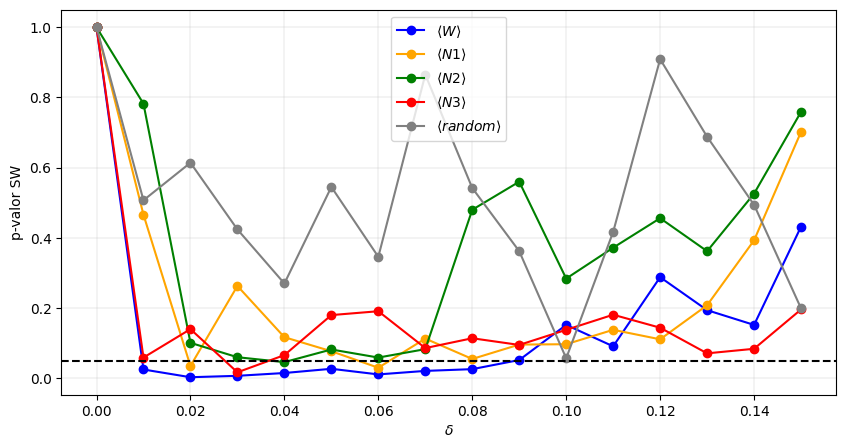

In [28]:
# Grafico pruebas de normalidad


fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(densidades_mod, p_vals_W_normal, label=r"$\langle W \rangle$", color = 'blue', marker = 'o')
ax.plot(densidades_mod, p_vals_N1_normal, label=r"$\langle N1 \rangle$", color = 'orange', marker = 'o')
ax.plot(densidades_mod,  p_vals_N2_normal, label=r"$\langle N2 \rangle$", color = 'green',marker = 'o')
ax.plot(densidades_mod,  p_vals_N3_normal, label=r"$\langle N3 \rangle$", color = 'red',marker = 'o')
ax.plot(densidades_mod,  p_vals_rand_normal, label=r"$\langle random \rangle$", color = 'gray',marker = 'o')
ax.axhline(y = 0.05,color = 'black', linestyle = "dashed")
ax.set_xlabel("$\delta$")
ax.set_ylabel("p-valor SW")
ax.legend()
ax.grid(linewidth = 0.2)

plt.savefig(dir + '/test_normal_modularidad.png')
plt.show()

Calculo test estadísticos para coeficientes de modularidad entre estadios de sueño vs random

In [30]:

# W vs. random
p_vals_W_rand =[]

for i in range(len(mod_W[0])):
  p_vals_W_rand.append(round(stats.mannwhitneyu(mod_W[:,i], mod_rand[:,i])[1],3))

p_vals_W_rand = (np.array(p_vals_W_rand) < 0.05).astype(int)

# N1 vs. random
p_vals_N1_rand =[]

for i in range(len(mod_N1[0])):
  p_vals_N1_rand.append(round(stats.mannwhitneyu(mod_N1[:,i], mod_rand[:,i])[1],3))

p_vals_N1_rand = (np.array(p_vals_N1_rand) < 0.05).astype(int)


# N2 vs. random
p_vals_N2_rand =[]

for i in range(len(mod_N2[0])):
  p_vals_N2_rand.append(round(stats.mannwhitneyu(mod_N2[:,i], mod_rand[:,i])[1],3))

p_vals_N2_rand = (np.array(p_vals_N2_rand) < 0.05).astype(int)

# N3 vs. random
p_vals_N3_rand =[]

for i in range(len(mod_N3[0])):
  p_vals_N3_rand.append(round(stats.mannwhitneyu(mod_N3[:,i], mod_rand[:,i])[1],3))

p_vals_N3_rand = (np.array(p_vals_N3_rand) < 0.05).astype(int)

Preparo datos para gráfico: promedio y SEM



In [31]:
W_mod_mean = np.mean(mod_W, axis = 0)
N1_mod_mean = np.mean(mod_N1, axis = 0)
N2_mod_mean = np.mean(mod_N2, axis = 0)
N3_mod_mean = np.mean(mod_N3, axis = 0)
mod_rand_mean = np.mean(mod_rand, axis = 0)

W_mod_sem = np.std(mod_W, axis = 0, ddof=1) / np.sqrt(np.size(mod_W, axis = 0))
N1_mod_sem = np.std(mod_N1, axis = 0, ddof=1) / np.sqrt(np.size(mod_N1, axis = 0))
N2_mod_sem = np.std(mod_N2, axis = 0, ddof=1) / np.sqrt(np.size(mod_N2, axis = 0))
N3_mod_sem = np.std(mod_N3, axis = 0, ddof=1) / np.sqrt(np.size(mod_N3, axis = 0))
mod_rand_sem = np.std(mod_rand, axis = 0, ddof=1) / np.sqrt(np.size(mod_rand, axis = 0))



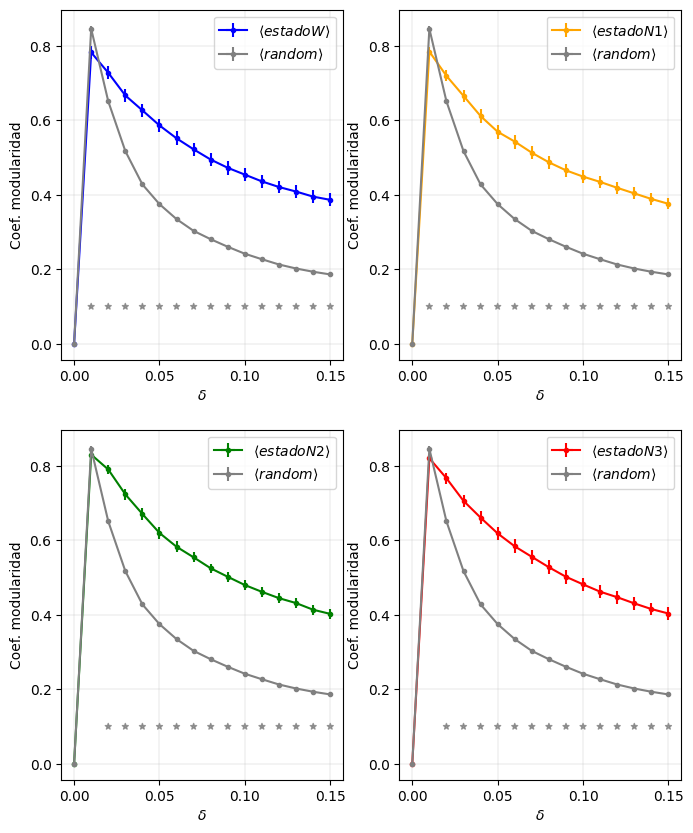

In [32]:
# Grafico
p_val = np.repeat(0.1,16)

fig, ax = plt.subplots(2,2, figsize=(8,10))

ax[0,0].errorbar(densidades_mod,W_mod_mean, xerr = 0, yerr = W_mod_sem, marker = '.', color = 'blue', ls = '-', label=r"$\langle estado W \rangle$")
ax[0,0].errorbar(densidades_mod,mod_rand_mean, xerr = 0, yerr = mod_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[0,0].scatter(densidades_mod, p_val, s= p_vals_W_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[0,1].errorbar(densidades_mod,N1_mod_mean, xerr = 0, yerr = N1_mod_sem,marker = '.',  color = 'orange', ls = '-', label=r"$\langle estado N1 \rangle$")
ax[0,1].errorbar(densidades_mod,mod_rand_mean, xerr = 0, yerr = mod_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[0,1].scatter(densidades_mod, p_val, s= p_vals_N1_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[1,0].errorbar(densidades_mod,N2_mod_mean, xerr = 0, yerr = N2_mod_sem, marker = '.', color = 'green', ls = '-', label=r"$\langle estado N2 \rangle$")
ax[1,0].errorbar(densidades_mod,mod_rand_mean, xerr = 0, yerr = mod_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[1,0].scatter(densidades_mod, p_val, s= p_vals_N2_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[1,1].errorbar(densidades_mod,N3_mod_mean, xerr = 0, yerr = N3_mod_sem,marker = '.', color = 'red', ls = '-', label=r"$\langle estado N3 \rangle$")
ax[1,1].errorbar(densidades_mod,mod_rand_mean, xerr = 0, yerr = mod_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[1,1].scatter(densidades_mod, p_val, s= p_vals_N3_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[0,0].set_xlabel("$\delta$")
ax[0,1].set_xlabel("$\delta$")
ax[1,0].set_xlabel("$\delta$")
ax[1,1].set_xlabel("$\delta$")

ax[0,0].set_ylabel("Coef. modularidad")
ax[0,1].set_ylabel("Coef. modularidad")
ax[1,0].set_ylabel("Coef. modularidad")
ax[1,1].set_ylabel("Coef. modularidad")

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

ax[0,0].grid(linewidth=0.2)
ax[0,1].grid(linewidth=0.2)
ax[1,0].grid(linewidth=0.2)
ax[1,1].grid(linewidth=0.2)

plt.savefig(dir + '/curvas_modularidad.png')
plt.show()

## Variación de cantidad de comunidades en función de δ. Curvas promedio (entre individuos)

In [33]:
def cant_comunidades_grafos(matAdyacPesada, densidad):
    G = matrizAdyacenciaBinaria(matAdyacPesada, densidad)
    M = cl.best_partition(G)
    # devuelve coef de modularidad y numero de nodos y enlaces para cada grafo
    return len(set(M.values())), G.number_of_edges()

com_W = np.zeros((len(W), len(densidades_mod)))
edges_W = np.zeros((len(W),len(densidades_mod)))

for i, densidad in enumerate(densidades_mod):
    for j, grafo in W.items():
      com_W[j-1,i],edges_W[j-1,i] = cant_comunidades_grafos(grafo, densidad)

com_N1 = np.zeros((len(N1), len(densidades_mod)))
#edges_N1 = np.zeros((len(N1),len(densidades_mod)))

for i, densidad in enumerate(densidades_mod):
    for j, grafo in N1.items():
      com_N1[j-1,i],_ = cant_comunidades_grafos(grafo, densidad)

com_N2 = np.zeros((len(N2), len(densidades_mod)))
#edges_N2 = np.zeros((len(N2),len(densidades_mod)))

for i, densidad in enumerate(densidades_mod):
    for j, grafo in N2.items():
      com_N2[j-1,i],_  = cant_comunidades_grafos(grafo, densidad)

com_N3 = np.zeros((len(N3), len(densidades_mod)))
#edges_N3 = np.zeros((len(N3),len(densidades_mod)))

for i, densidad in enumerate(densidades_mod):
    for j, grafo in N3.items():
      com_N3[j-1,i],_  = cant_comunidades_grafos(grafo, densidad)


In [34]:
# Genero grafos random y calculo n de comunidades
def cant_com_grafos_random(cant_nodos, cant_enlaces,seed):
  G = nx.gnm_random_graph(cant_nodos,cant_enlaces,seed)
  M = cl.best_partition(G)
  # devuelve coef de modularidad y numero de nodos y enlaces para cada grafo
  return len(set(M.values()))

In [35]:
com_rand = np.zeros((len(edges_W), len(edges_W[0])))

for i in range(0,len(com_rand[0])):
  for j in range(0,len(com_rand)):
     com_rand[j,i] = cant_com_grafos_random(W_mean.shape[0], edges_W[j,i],j)

In [40]:
# Calculo medidas para el gráfico

W_com_mean = np.mean(com_W, axis = 0)
N1_com_mean = np.mean(com_N1, axis = 0)
N2_com_mean = np.mean(com_N2, axis = 0)
N3_com_mean = np.mean(com_N3, axis = 0)
com_rand_mean = np.mean(com_rand, axis = 0)

W_com_sem = np.std(com_W, axis = 0, ddof=1) / np.sqrt(np.size(com_W, axis = 0))
N1_com_sem = np.std(com_N1, axis = 0, ddof=1) / np.sqrt(np.size(com_N1, axis = 0))
N2_com_sem = np.std(com_N2, axis = 0, ddof=1) / np.sqrt(np.size(com_N2, axis = 0))
N3_com_sem = np.std(com_N3, axis = 0, ddof=1) / np.sqrt(np.size(com_N3, axis = 0))
com_rand_sem = np.std(com_rand, axis = 0, ddof=1) / np.sqrt(np.size(com_rand, axis = 0))

Testeo supuestos de normalidad para cantidad de módulos

In [36]:
# Testeo supuestos para cantida de módulos: normalidad. No aplica TCL por n pequeño.

p_vals_W_normal =[]

for i in range(len(com_W[0])):
  p_vals_W_normal.append(round(stats.shapiro(com_W[:,i])[1],3))

#p_vals_W_normal = (np.array(p_vals_W_normal) < 0.05).astype(int)

# N1
p_vals_N1_normal =[]

for i in range(len(com_N1[0])):
  p_vals_N1_normal.append(round(stats.shapiro(com_N1[:,i])[1],3))

#p_vals_N1_normal = (np.array(p_vals_N1_normal) < 0.05).astype(int)


# N2
p_vals_N2_normal =[]

for i in range(len(com_N2[0])):
  p_vals_N2_normal.append(round(stats.shapiro(com_N2[:,i])[1],3))

#p_vals_N2_normal = (np.array(p_vals_N2_normal) < 0.05).astype(int)

# N3
p_vals_N3_normal =[]

for i in range(len(com_N3[0])):
  p_vals_N3_normal.append(round(stats.shapiro(com_N3[:,i])[1],3))

#p_vals_N3_normal = (np.array(p_vals_N3_normal) < 0.05).astype(int)

# Random
p_vals_rand_normal =[]

for i in range(len(com_rand[0])):
  p_vals_rand_normal.append(round(stats.shapiro(com_rand[:,i])[1],3))

#p_vals_rand_normal = (np.array(p_vals_rand_normal) < 0.05).astype(int)

sw_cant_comunidades = pd.DataFrame({"Densidad" : densidades_mod,
                              "W" : p_vals_W_normal,
                              "N1" : p_vals_N1_normal,
                              "N2" : p_vals_N2_normal,
                              "N3" : p_vals_N3_normal
                               })

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


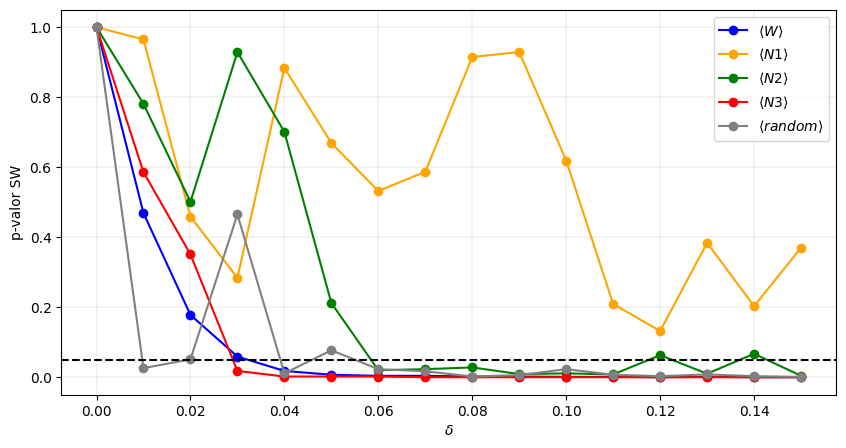

In [37]:
# Grafico resultados de test de normalidad para cantidad de módulos

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(densidades_mod, p_vals_W_normal, label=r"$\langle W \rangle$", color = 'blue', marker = 'o')
ax.plot(densidades_mod, p_vals_N1_normal, label=r"$\langle N1 \rangle$", color = 'orange', marker = 'o')
ax.plot(densidades_mod,  p_vals_N2_normal, label=r"$\langle N2 \rangle$", color = 'green',marker = 'o')
ax.plot(densidades_mod,  p_vals_N3_normal, label=r"$\langle N3 \rangle$", color = 'red',marker = 'o')
ax.plot(densidades_mod,  p_vals_rand_normal, label=r"$\langle random \rangle$", color = 'gray',marker = 'o')
ax.axhline(y = 0.05,color = 'black', linestyle = "dashed")
ax.set_xlabel("$\delta$")
ax.set_ylabel("p-valor SW")
ax.legend()
ax.grid(linewidth = 0.2)

plt.savefig(dir + '/test_normal_comunidades.png')
plt.show()

Test estadístico para cant comunidades (MAnn Whitney)

In [38]:
# Mann-Whitney

# W vs. random
p_vals_W_rand =[]

for i in range(len(com_W[0])):
  p_vals_W_rand.append(round(stats.mannwhitneyu(com_W[:,i], com_rand[:,i])[1],3))

p_vals_W_rand = (np.array(p_vals_W_rand) < 0.05).astype(int)

# N1 vs. random
p_vals_N1_rand =[]

for i in range(len(com_N1[0])):
  p_vals_N1_rand.append(round(stats.mannwhitneyu(com_N1[:,i], com_rand[:,i])[1],3))

p_vals_N1_rand = (np.array(p_vals_N1_rand) < 0.05).astype(int)


# N2 vs. random
p_vals_N2_rand =[]

for i in range(len(com_N2[0])):
  p_vals_N2_rand.append(round(stats.mannwhitneyu(com_N2[:,i], com_rand[:,i])[1],3))

p_vals_N2_rand = (np.array(p_vals_N2_rand) < 0.05).astype(int)

# N3 vs. random
p_vals_N3_rand =[]

for i in range(len(com_N3[0])):
  p_vals_N3_rand.append(round(stats.mannwhitneyu(com_N3[:,i], com_rand[:,i])[1],3))

p_vals_N3_rand = (np.array(p_vals_N3_rand) < 0.05).astype(int)


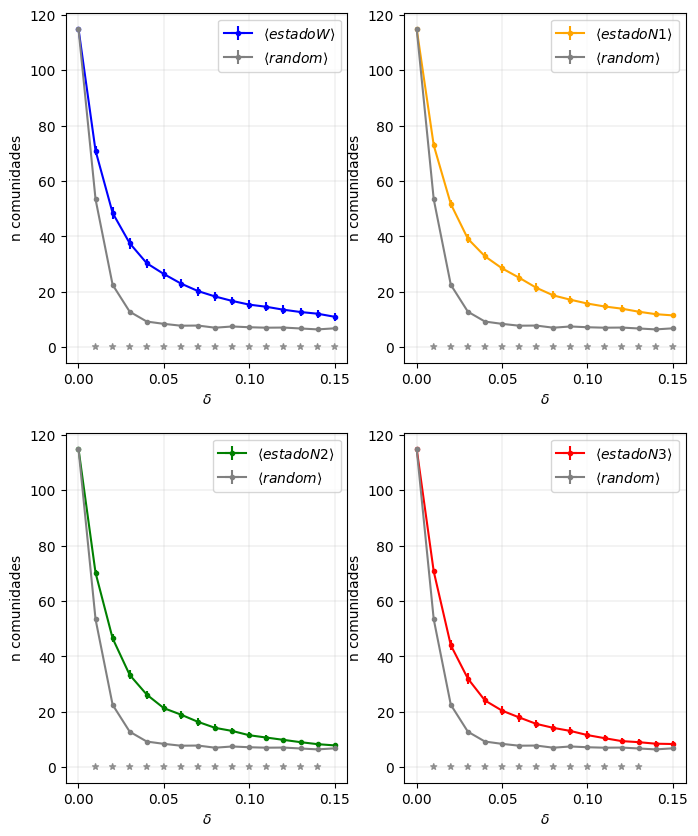

In [41]:
# Grafico

p_val = np.repeat(0.1,16)

fig, ax = plt.subplots(2,2, figsize=(8,10))

ax[0,0].errorbar(densidades_mod,W_com_mean, xerr = 0, yerr = W_com_sem, marker = '.', color = 'blue', ls = '-', label=r"$\langle estado W \rangle$")
ax[0,0].errorbar(densidades_mod,com_rand_mean, xerr = 0, yerr = com_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[0,0].scatter(densidades_mod, p_val, s= p_vals_W_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[0,1].errorbar(densidades_mod,N1_com_mean, xerr = 0, yerr = N1_com_sem,marker = '.',  color = 'orange', ls = '-', label=r"$\langle estado N1 \rangle$")
ax[0,1].errorbar(densidades_mod,com_rand_mean, xerr = 0, yerr = com_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[0,1].scatter(densidades_mod, p_val, s= p_vals_N1_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[1,0].errorbar(densidades_mod,N2_com_mean, xerr = 0, yerr = N2_com_sem, marker = '.', color = 'green', ls = '-', label=r"$\langle estado N2 \rangle$")
ax[1,0].errorbar(densidades_mod,com_rand_mean, xerr = 0, yerr = com_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[1,0].scatter(densidades_mod, p_val, s= p_vals_N2_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[1,1].errorbar(densidades_mod,N3_com_mean, xerr = 0, yerr = N3_com_sem,marker = '.', color = 'red', ls = '-', label=r"$\langle estado N3 \rangle$")
ax[1,1].errorbar(densidades_mod,com_rand_mean, xerr = 0, yerr = com_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[1,1].scatter(densidades_mod, p_val, s= p_vals_N3_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[0,0].set_xlabel("$\delta$")
ax[0,1].set_xlabel("$\delta$")
ax[1,0].set_xlabel("$\delta$")
ax[1,1].set_xlabel("$\delta$")

ax[0,0].set_ylabel("n comunidades")
ax[0,1].set_ylabel("n comunidades")
ax[1,0].set_ylabel("n comunidades")
ax[1,1].set_ylabel("n comunidades")

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

ax[0,0].grid(linewidth=0.2)
ax[0,1].grid(linewidth=0.2)
ax[1,0].grid(linewidth=0.2)
ax[1,1].grid(linewidth=0.2)

plt.savefig(dir + '/curvas_comunidades.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
sw_modularidad


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


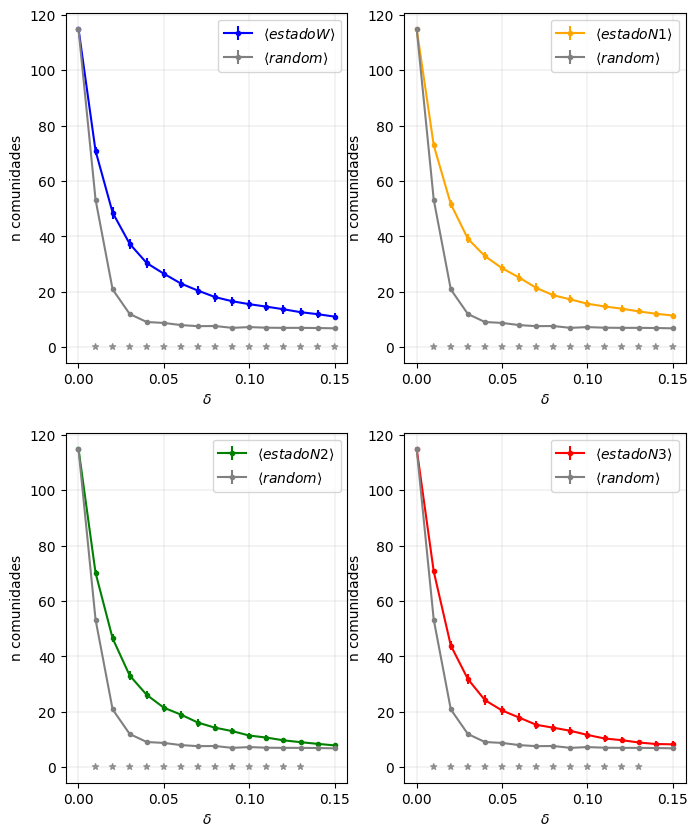

In [79]:
# Grafico

p_val = np.repeat(0.1,16)

fig, ax = plt.subplots(2,2, figsize=(8,10))

ax[0,0].errorbar(densidades_mod,W_com_mean, xerr = 0, yerr = W_com_sem, marker = '.', color = 'blue', ls = '-', label=r"$\langle estado W \rangle$")
ax[0,0].errorbar(densidades_mod,com_rand_mean, xerr = 0, yerr = com_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[0,0].scatter(densidades_mod, p_val, s= p_vals_W_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[0,1].errorbar(densidades_mod,N1_com_mean, xerr = 0, yerr = N1_com_sem,marker = '.',  color = 'orange', ls = '-', label=r"$\langle estado N1 \rangle$")
ax[0,1].errorbar(densidades_mod,com_rand_mean, xerr = 0, yerr = com_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[0,1].scatter(densidades_mod, p_val, s= p_vals_N1_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[1,0].errorbar(densidades_mod,N2_com_mean, xerr = 0, yerr = N2_com_sem, marker = '.', color = 'green', ls = '-', label=r"$\langle estado N2 \rangle$")
ax[1,0].errorbar(densidades_mod,com_rand_mean, xerr = 0, yerr = com_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[1,0].scatter(densidades_mod, p_val, s= p_vals_N2_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[1,1].errorbar(densidades_mod,N3_com_mean, xerr = 0, yerr = N3_com_sem,marker = '.', color = 'red', ls = '-', label=r"$\langle estado N3 \rangle$")
ax[1,1].errorbar(densidades_mod,com_rand_mean, xerr = 0, yerr = com_rand_sem, marker = '.', color = 'gray', ls = '-', label=r"$\langle random \rangle$")
ax[1,1].scatter(densidades_mod, p_val, s= p_vals_N3_rand * 20, color = 'gray',alpha= 0.8, marker = '*')

ax[0,0].set_xlabel("$\delta$")
ax[0,1].set_xlabel("$\delta$")
ax[1,0].set_xlabel("$\delta$")
ax[1,1].set_xlabel("$\delta$")

ax[0,0].set_ylabel("n comunidades")
ax[0,1].set_ylabel("n comunidades")
ax[1,0].set_ylabel("n comunidades")
ax[1,1].set_ylabel("n comunidades")

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

ax[0,0].grid(linewidth=0.2)
ax[0,1].grid(linewidth=0.2)
ax[1,0].grid(linewidth=0.2)
ax[1,1].grid(linewidth=0.2)

plt.savefig(dir + '/curvas_comunidades_mann_whitney.png')
plt.show()